<a href="https://colab.research.google.com/github/SagarMeti5/Credit-Risk-Modeling/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import pandas as pd

# List all files in your dataset folder
data=pd.read_csv("/content/drive/MyDrive/accepted_2007_to_2018Q4.csv",low_memory=False)

In [5]:
print(data.shape)
data.head()

(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Info about dataset
data.info()

# Summary statistics
data.describe()

# Missing values
missing = data.isnull().sum().sort_values(ascending=False)
print(missing.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_reason                               2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
payment_plan_start_date                       2249784
hardship_type                                 2249784
hardship_status                               2249784
hardship_start_date                           2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_dpd                                  2249784
hardship_loan_status                          2249784
hardship_length                               2249784
hardship_end_date                             2249784
settlement_

In [7]:
# Select a subset of useful features
features = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'purpose',
    'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'loan_status'
]

df = data[features].copy()
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,revol_util,total_acc,loan_status
0,3600.0,36 months,13.99,C,C4,10+ years,MORTGAGE,55000.0,debt_consolidation,5.91,0.0,29.7,13.0,Fully Paid
1,24700.0,36 months,11.99,C,C1,10+ years,MORTGAGE,65000.0,small_business,16.06,1.0,19.2,38.0,Fully Paid
2,20000.0,60 months,10.78,B,B4,10+ years,MORTGAGE,63000.0,home_improvement,10.78,0.0,56.2,18.0,Fully Paid
3,35000.0,60 months,14.85,C,C5,10+ years,MORTGAGE,110000.0,debt_consolidation,17.06,0.0,11.6,17.0,Current
4,10400.0,60 months,22.45,F,F1,3 years,MORTGAGE,104433.0,major_purchase,25.37,1.0,64.5,35.0,Fully Paid


In [8]:
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing loan_status
df = df.dropna(subset=['loan_status'])

# Encode categorical variables
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','purpose','loan_status']
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Fill missing values with median
df = df.fillna(df.median(numeric_only=True))
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,revol_util,total_acc,loan_status
0,3600.0,0,13.99,2,13,1,1,55000.0,2,5.91,0.0,29.7,13.0,5
1,24700.0,0,11.99,2,10,1,1,65000.0,11,16.06,1.0,19.2,38.0,5
2,20000.0,1,10.78,1,8,1,1,63000.0,4,10.78,0.0,56.2,18.0,5
3,35000.0,1,14.85,2,14,1,1,110000.0,2,17.06,0.0,11.6,17.0,1
4,10400.0,1,22.45,5,25,3,1,104433.0,6,25.37,1.0,64.5,35.0,5


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Taking a manageable sample to avoid memory issues
df_sample = df.sample(50000, random_state=42)

# Features and target
X = df_sample.drop('loan_status', axis=1)
y = df_sample['loan_status']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[  71  314    0    0  794    0    0    0]
 [  57 2495    0    0 1318    0    0    0]
 [   0    1    0    0    4    0    0    0]
 [   0    0    0    0   10    0    0    0]
 [  88 1072    0    0 3620    0    0    0]
 [   1   17    0    0   19    0    0    0]
 [   1   14    0    0    7    0    0    0]
 [   5   57    0    0   35    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.06      0.10      1179
           1       0.63      0.64      0.64      3870
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        10
           5       0.62      0.76      0.68      4780
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        97

    accuracy                           0.62     10000
   macro avg       0.20      0.18      0.18     10000
weighted avg   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


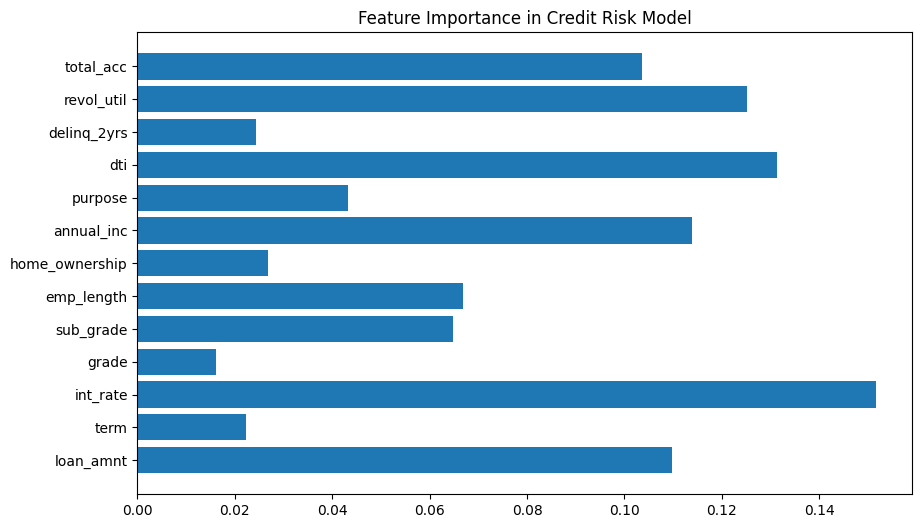

In [12]:
import matplotlib.pyplot as plt

feat_importance = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, feat_importance)
plt.title("Feature Importance in Credit Risk Model")
plt.show()